# Compute root of $f(x)=\exp(-x)-1$

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demslv01.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Sept-04</i>
<hr>



## About

Compute root of $f(x)=\exp(-x)-1$ using Newton and secant methods. Initial value generated randomly. True root is $x=0$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from compecon import NLP, tic, toc


### Set up the problem

In [2]:
def f(x):
    fval = np.exp(-x) - 1
    fjac = -np.exp(-x)
    return fval, fjac

problem = NLP(f, all_x=True)

### Randomly generate starting point

In [3]:
np.random.RandomState(seed=2022)
problem.x0 = -10 * np.random.rand(1)

### Compute root using Newton method

In [4]:
t0 = tic()
x1 = problem.newton()
t1 = 100 * toc(t0)
n1, x_newton = problem.fnorm, problem.x_sequence
x_newton

,x_0
iteration,
0,-3.101080e+00
1,-2.146081e+00
2,-1.263022e+00
3,-5.458203e-01
4,-1.251866e-01
5,-7.518848e-03
6,-2.819583e-05
7,-3.974987e-10


### Compute root using Broyden method

In [5]:
t0 = tic()
x2 = problem.broyden()
t2 = 100 * toc(t0)
n2, x_broyden = problem.fnorm, problem.x_sequence
x_broyden

,x_0
iteration,
0,-3.101080e+00
1,-2.146081e+00
2,-1.618567e+00
3,-1.009726e+00
4,-5.480429e-01
5,-2.160518e-01
6,-5.221796e-02
7,-5.393952e-03
8,-1.394817e-04


### Print results

In [6]:
print('Hundredths of seconds required to compute root of exp(-x)-1,')
print('via Newton and Broyden methods, starting at x = %4.2f.' % problem.x0)

pd.DataFrame({
    'Time': [t1, t2],
    'Norm of f': [n1, n2],
    'Final x': [x1, x2]},
    index=['Newton', 'Broyden']
)

Hundredths of seconds required to compute root of exp(-x)-1,
via Newton and Broyden methods, starting at x = -3.10.


,Time,Norm of f,Final x
Newton,0.199866,3.974987e-10,-3.974987e-10
Broyden,0.899768,2.621015e-11,-2.621013e-11


### View current options for solver

In [7]:
print(problem.opts)

Options for solving a NLP:

	    all_x = True
	    initb = None
	    initi = False
	    maxit = 100
	 maxsteps = 10
	   method = broyden
	     show = False
	  squeeze = True
	      tol = 1.4901161193847656e-08
	transform = ssmooth



# Describe the options

In [8]:
print(problem.opts.__doc__)

 A container for options to find a zero for a NLP or MCP

    Attributes: default in brackets
        method:     either ['newton'] or 'broyden'
        maxit:      maximum number of iterations [100]
        maxsteps:   maximum number of backsteps [10]
        tol:        convergence tolerance [sqrt(machine eps)]
        initb:      an initial inverse Jacobian aprroximation matrix [None]
        initi:      if True, use the identity matrix to initialize Jacobian,
                    if [False], a numerical Jacobian will be used
        transform:  either ['ssmooth'] or 'minmax', required for MC problems
        show:       print to screen if [True], quiet if False
        all_x:      whether to output the full solution sequence too [False]
        squeeze:    if problem has ony one dimension, return solution as scalar [True]
    


### Plot the convergence

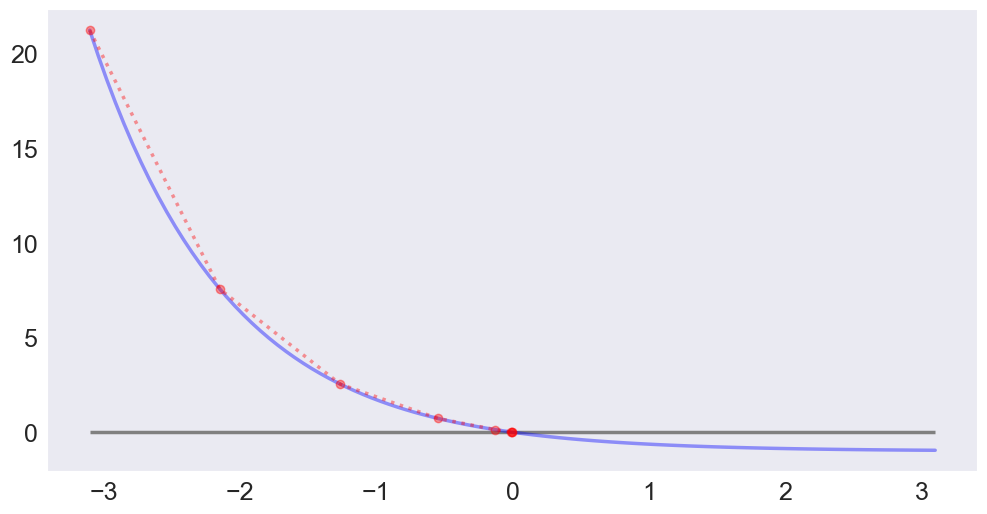

In [9]:
b = -abs(problem.x0)
a = -b
xx = np.linspace(a, b, 100)

fig, ax = plt.subplots()
ax.hlines(0, a, b, 'gray')
ax.plot(xx, f(xx)[0], 'b-', alpha=0.4)
ax.plot(x_newton,f(x_newton)[0],'ro:', alpha=0.4);